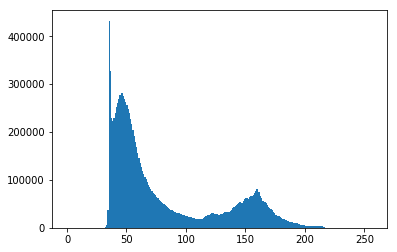

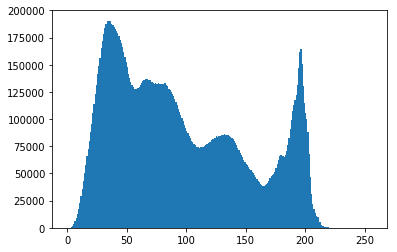

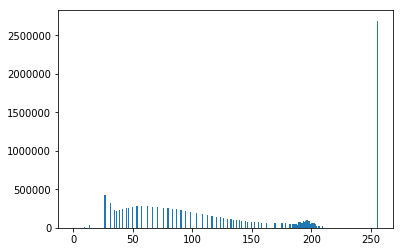

In [2]:
 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram(img):
    height=img.shape[0]
    weight=img.shape[1]
    hist = np.zeros((256))
    for i in np.arange(height):
        for j in np.arange(width):
            a=img.item(i,j)
            hist[a] +=1
    return hist

def cumulative(hist):
    cum_hist=hist.copy()
    for i in np.arange(1,256):
        cum_hist[i]=cum_hist[i-1]+cum_hist[i]
    return cum_hist

img = cv2.imread("1.jpg",0)

# cv2.imshow('original',img)
plt.hist(img.ravel(),256,[0,256])
plt.show()
ref = cv2.imread("2.jpg",0)
# cv2.imshow('reference image',ref)
plt.hist(ref.ravel(),256,[0,256])
plt.show()

height=img.shape[0]
width=img.shape[1]
pixels=height*width

height_ref=ref.shape[0]
width_ref=ref.shape[1]
pixels_ref=height_ref*width_ref

hist=histogram(img)
hist_ref=histogram(ref)

cum_hist=cumulative(hist)
cum_hist_ref=cumulative(hist_ref)

prob_cum_hist=cum_hist/pixels
prob_cum_hist_ref=cum_hist_ref/pixels_ref

K=256
new_values=np.zeros((K))

for a in np.arange(K):
    j=K-1
    while True:
        new_values[a]=j
        j=j-1
        if j<0 or prob_cum_hist[a]>prob_cum_hist_ref[j]:
            break

for i in np.arange(height):
    for j in np.arange(width):
        a=img.item(i,j)
        b=new_values[a]
        img.itemset((i,j),b)

cv2.imshow('matched',img)
plt.hist(img.ravel(),256,[0,256])
plt.show()